In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [3]:
data = pd.read_csv("/kaggle/input/mnist-in-csv/mnist_train.csv")

In [4]:
data.head()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
data = np.array(data)
m, n = data.shape # m=no.of rows, n=no.of columns
np.random.shuffle(data)
print(m,n)

60000 785


In [9]:
train_data = data[0:int(0.8*m),:]
val_data = data[int(0.8*m):m,:]

X_train = train_data[:, 1:].T #doing transpose using .T since we want each column to represent an image with all its pixel values
X_train = X_train / 255 # scaling all the pixel values from 0-255 to 0-1 by dividing it by 255 (Normalizing pixel values)
Y_train = train_data[:, 0] #labels corresponding to 48000 imgs

X_val = val_data[:, 1:].T  #doing transpose using .T since we want each column to represent an image with all its pixel values
X_val = X_val / 255  # scaling all the pixel values from 0-255 to 0-1 by dividing it by 255 (Normalizing pixel values)
Y_val = val_data[:, 0] #labels corresponding to 12000 imgs

In [10]:
print(X_train.shape)
print(Y_train.shape)
print(X_val.shape)
print(Y_val.shape)

(784, 48000)
(48000,)
(784, 12000)
(12000,)


In [21]:
def initialize_parameters():
    W1 = np.random.rand(10,784) - 0.5 #initializing w1 matrix of size 10x784 with values ranging from -0.5 to 0.5
    B1 = np.random.rand(10,1) - 0.5   #initializing w1 matrix of size 10x1 with values ranging from -0.5 to 0.5
    W2 = np.random.rand(10,10) - 0.5  #initializing w1 matrix of size 10x10 with values ranging from -0.5 to 0.5
    B2 = np.random.rand(10,1) - 0.5   #initializing w1 matrix of size 10x1 with values ranging from -0.5 to 0.5

    return W1, B1, W2, B2

def ReLU(X):
    return np.maximum(X,0)

def softmax_calculator(Z):
    return np.exp(Z) / sum(np.exp(Z))

def one_hot_converter(Y):
    one_hot_Y = np.zeros((Y.size, Y.max() + 1)) # 48000 x (9+1) matrix of zeros
    one_hot_Y[np.arange(Y.size), Y] = 1 # wherever index of Y is coming we are assigning its value as 1
    one_hot_Y = one_hot_Y.T
    return one_hot_Y
    
def forward_propagation(W1, B1, W2, B2, X):
    Z1 = W1.dot(X) + B1
    A1 = ReLU(Z1)
    Z2 = W2.dot(A1) + B2
    A2 = softmax_calculator(Z2)
    return Z1, A1, Z2, A2

def backward_propagation(W1, B1, W2, B2, Z1, A1, Z2, A2, X, Y):
    one_hot_Y = one_hot_converter(Y)
    dZ2 = A2 - one_hot_Y
    dW2 = 1 / m * dZ2.dot(A1.T)
    dB2 = 1 / m * np.sum(dZ2)
    dZ1 = W2.T.dot(dZ2) * (Z1 > 0)
    
    dW1 = 1 / m * dZ1.dot(X.T)
    dB1 = 1 / m * np.sum(dZ1)
    
    return dW1, dB1, dW2, dB2

def get_predictions(A):
    return np.argmax(A,0)

def get_accuracy(predictions, Y):
    return np.sum(predictions == Y) / Y.size

def update_parameters(W1, B1, W2, B2, dW1, dB1, dW2, dB2, learning_rate):
    W1 = W1 - learning_rate * dW1
    B1 = B1 - learning_rate * dB1
    W2 = W2 - learning_rate * dW2
    B2 = B2 - learning_rate * dB2
    
    return W1, B1, W2, B2


def gradient_descent(X, Y, alpha, iterations):
    W1, B1, W2, B2 = initialize_parameters()

    for i in range(iterations):
        Z1, A1, Z2, A2 = forward_propagation(W1, B1, W2, B2, X)
        dW1, dB1, dW2, dB2 = backward_propagation(W1, B1, W2, B2, Z1, A1, Z2, A2, X, Y)
        W1, B1, W2, B2 = update_parameters(W1, B1, W2, B2, dW1, dB1, dW2, dB2, alpha)


        if (i%20)==0:
            print("Iteration number:", i)
            print("Accuracy =", get_accuracy(get_predictions(A2), Y))

    return W1, B1, W2, B2
    


In [23]:
W1, B1, W2, B2 = gradient_descent(X_train, Y_train, 0.1, 1000)

Iteration number: 0
Accuracy = 0.13491666666666666
Iteration number: 20
Accuracy = 0.2101875
Iteration number: 40
Accuracy = 0.3508125
Iteration number: 60
Accuracy = 0.474625
Iteration number: 80
Accuracy = 0.5607291666666666
Iteration number: 100
Accuracy = 0.6216666666666667
Iteration number: 120
Accuracy = 0.6689375
Iteration number: 140
Accuracy = 0.7034375
Iteration number: 160
Accuracy = 0.728375
Iteration number: 180
Accuracy = 0.7485
Iteration number: 200
Accuracy = 0.7643541666666667
Iteration number: 220
Accuracy = 0.7772083333333333
Iteration number: 240
Accuracy = 0.7879583333333333
Iteration number: 260
Accuracy = 0.7969791666666667
Iteration number: 280
Accuracy = 0.8046666666666666
Iteration number: 300
Accuracy = 0.8116458333333333
Iteration number: 320
Accuracy = 0.8175625
Iteration number: 340
Accuracy = 0.823375
Iteration number: 360
Accuracy = 0.8274375
Iteration number: 380
Accuracy = 0.8314791666666667
Iteration number: 400
Accuracy = 0.8347916666666667
Iteration

Predicted Label:  [6]
Actual Label:  2


<function matplotlib.pyplot.show(close=None, block=None)>

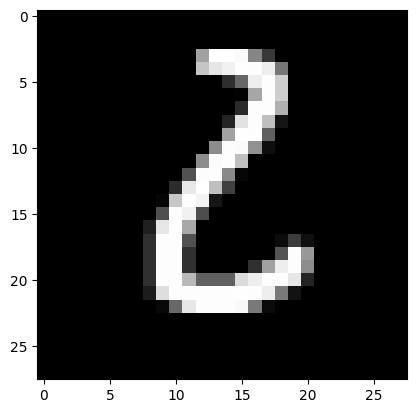

In [28]:
val_index = 10

Z1val, A1val, Z2val, A2val = forward_propagation(W1, B1, W2, B2, X_val[:, val_index, None])
print("Predicted Label: ", get_predictions(A2val))
print("Actual Label: ", Y_val[val_index])

image_array = X_val[:,val_index].reshape(28,28)
plt.imshow(image_array, cmap="gray")
plt.show

In [30]:
Z1val, A1val, Z2val, A2val = forward_propagation(W1, B1, W2, B2, X_val)
val_acc =get_accuracy(get_predictions(A2val), Y_val)
print("Validation Accuracy = ", val_acc)

Validation Accuracy =  0.8738333333333334
